<a href="https://colab.research.google.com/github/krixik-ai/krixik-docs/blob/main/docs/examples/search_pipeline_examples/multi_keyword_searchable_image_captions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
import json
import importlib
from pathlib import Path

# preparación de demo - incuye instanciación de secretos, instalación de requerimientos, y definición de rutas
if os.getenv("COLAB_RELEASE_TAG"):
    # si estás usando este notebook en Google Colab, ingresa tus secretos acá
    MY_API_KEY = "TU_API_KEY_VA_AQUI"
    MY_API_URL = "TU_API_URL_VA_AQUI"

    # si estás usando este notebook en Google Colab, instala requerimientos y descarga los subdirectorios requeridos
    # instala el cliente Python de Krixik
    !pip install krixik

    # instala github-clone, que permite clonación fácil de los subdirectorios del repositorio de documentación XXX
    !pip install github-clone

    # clona los conjuntos de datos
    if not Path("data").is_dir():
        !ghclone XXXX #(in english it's https://github.com/krixik-ai/krixik-docs/tree/main/data)
    else:
        print("ya se clonaron los conjuntos de datos de documentación!")

    # define la variable 'data_dir' para tus rutas
    data_dir = "./data/"

    # crea directorio de salidas
    from pathlib import Path

    Path(data_dir + "/salidas").mkdir(parents=True, exist_ok=True)

    # descarga utilidades
    if not Path("utilities").is_dir():
        !ghclone XXXX # (in english it's https://github.com/krixik-ai/krixik-docs/tree/main/utilities)
    else:
        print("ya has clonado las utilidades de documentación!")
else:
    # si estás usando una descarga local de la documentación, define las rutas relativas a la estructura local de la documentación
    # importa utilidades
    sys.path.append("../../../")

    # define la variable 'data_dir' para tus rutas
    data_dir = "../../../data/"

    # si estás usando este notebook localmente desde el repositorio de documentación Krixik, carga tus secretos de un archivo .env ubicado en la base del repositorio de documentación
    from dotenv import load_dotenv

    load_dotenv("../../../.env")

    MY_API_KEY = os.getenv("MY_API_KEY")
    MY_API_URL = os.getenv("MY_API_URL")


# carga 'reset'
reset = importlib.import_module("utilities.reset")
reset_pipeline = reset.reset_pipeline


# importa Krixik e inicializa sesión con tus secretos personales
from krixik import krixik

krixik.init(api_key=MY_API_KEY, api_url=MY_API_URL)

SUCCESS: You are now authenticated.


## *Pipeline* Multimodular: Búsqueda por Palabras Clave sobre Leyendas de Imagen

Este documento detalla un *pipeline* multimodular que recibe una imagen como entrada, le genera una [`leyenda`](../../modulos/modulos_ia/modulo_caption_leyenda_de_imagen.md), y habilita [`búsqueda por palabras clave`](../../sistema/metodos_de_busqueda/metodo_keyword_search_busqueda_por_palabras_clave.md) sobre la leyenda.

El documento se divide en las siguientes secciones:

- [Monta tu *Pipeline*](#monta-tu-pipeline)
- [Procesa un Archivo de Entrada](#procesa-un-archivo-de-entrada)
- [Búsqueda por Palabras Clave](#busqueda-por-palabras-clave)

### Monta tu *Pipeline*

Para lograr lo arriba descrito, monta un pipeline que consiste de los siguientes módulos en secuencia:

- Un módulo [`caption` (leyenda de imagen)](../../modulos/modulos_ia/modulo_caption_leyenda_de_imagen.md).

- Un módulo [`json-to-txt`](../../modulos/modulos_de_funciones_de_apoyo/modulo_json-to-txt.md).

- Un módulo [`keyword-db` (base de datos de palabras clave)](../../modulos/modulos_de_bases_de_datos/modulo_keyword-db_base_de_datos_de_palabras_clave.md).

Para esto usarás el método [`create_pipeline`](../../sistema/creacion_de_pipelines/creacion_de_pipelines.md) de la siguiente manera:

In [2]:
# crear el pipeline descrito
pipeline = krixik.create_pipeline(name="multi_busqueda_por_palabras_clave_leyendas_de_imagenes",
                                  module_chain=["caption", "json-to-txt", "keyword-db"])

### Procesa un Archivo de Entrada

Examina el archivo de prueba antes de continuar:

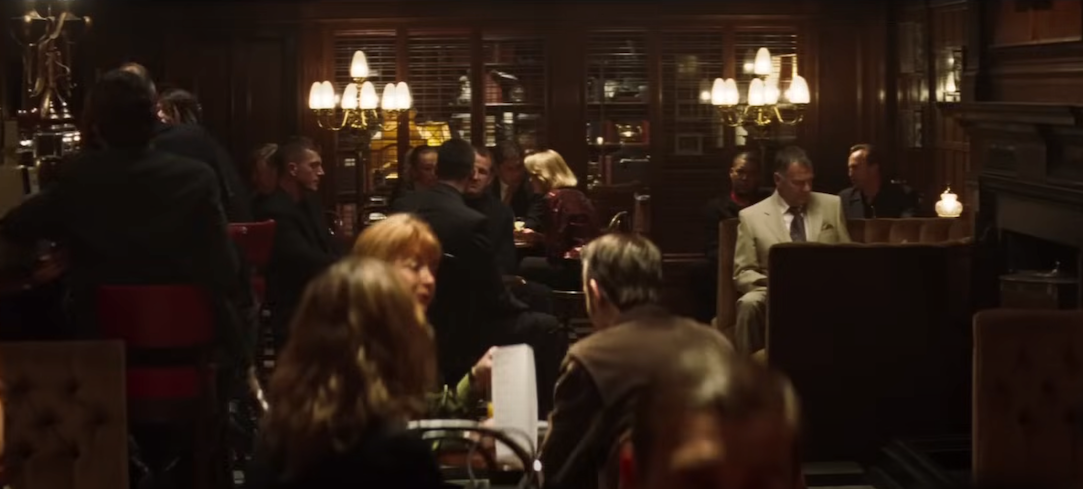

In [3]:
# examina el archivo de entrada
from IPython.display import Image

Image(filename=data_dir + "input/restaurante.png")

Usarás los modelos predeterminados en este *pipeline*, así que el argumento [`modules`](../../sistema/parametros_y_procesar_archivos_a_traves_de_pipelines/metodo_process_procesar.md#seleccion-de-modelo-por-medio-del-argumento-modules) del método [`process`](../../sistema/parametros_y_procesar_archivos_a_traves_de_pipelines/metodo_process_procesar.md) no hará falta.

In [4]:
# procesa el archivo a través del pipeline según lo arriba descrito
process_output = pipeline.process(
    local_file_path=data_dir + "input/restaurant.png",  # la ruta de archivo inicial en la que yace el archivo de entrada
    local_save_directory=data_dir + "output",  # el directorio local en el que se guardará el archivo de salida
    expire_time=60 * 30,  # data de este proceso se eliminará del sistema Krixik en 30 minutos
    wait_for_process=True,  # espera que el proceso termine antes de devolver control del IDE al usuario
    verbose=False, # no mostrar actualizaciones de proceso al ejecutar el código
)

Reproduce la salida de este proceso con el siguiente código. Para aprender más sobre cada componente de la salida, estudia la documentación del método [`process`](../../sistema/parametros_y_procesar_archivos_a_traves_de_pipelines/metodo_process_procesar.md).

Dado que la salida de este modelo/módulo es un archivo de base de datos `SQLlite`, `process_output` se muestra como "null". Sin embargo, el archivo de salida se ha guardado en la ubicación indicada bajo `process_output_files`. El `file_id` del archivo procesado es el prefijo del nombre del archivo de salida en esta ubicación.

In [5]:
# nítidamente reproduce la salida de este proceso
print(json.dumps(process_output, indent=2))

{
  "status_code": 200,
  "pipeline": "multi_keyword_searchable_image_captions",
  "request_id": "a5d38d01-9ff0-492e-abeb-6e1e14ec9ee6",
  "file_id": "913dce6e-2fbe-4d5a-bbd2-84c6a0a73932",
  "message": "SUCCESS - output fetched for file_id 913dce6e-2fbe-4d5a-bbd2-84c6a0a73932.Output saved to location(s) listed in process_output_files.",
  "warnings": [],
  "process_output": null,
  "process_output_files": [
    "../../../data/output/913dce6e-2fbe-4d5a-bbd2-84c6a0a73932.db"
  ]
}


### Busqueda por Palabras Clave

El método [`keyword_search` (búsqueda por palabras clave)](../../sistema/metodos_de_busqueda/metodo_keyword_search_busqueda_por_palabras_clave.md) de Krixik habilita búsqueda por palabras clave sobre documentos procesados a través de *pipelines* que terminan con el módulo [`keyword-db` (base de datos de palabras clave)](../../modulos/modulos_de_bases_de_datos/modulo_keyword-db_base_de_datos_de_palabras_clave.md).

Dado que tu *pipeline* satisface esta condición tiene acceso al método [`keyword_search`](../../sistema/metodos_de_busqueda/metodo_keyword_search_busqueda_por_palabras_clave.md). Úsalo de la siguiente manera para buscar palabras clave en la leyenda que se generó con base en la imagen:

In [6]:
# haz búsqueda por palabras clave sobre la leyenda generada con base en la imagen procesada por el pipeline
keyword_output = pipeline.keyword_search(query="people bar sitting tables dinner drinks",
                                         file_ids=[process_output["file_id"]])

# nítidamente reproduce la salida de esta búsqueda
print(json.dumps(keyword_output, indent=2))

{
  "status_code": 200,
  "request_id": "1804483a-1551-47f4-b1f1-193afa1e8796",
  "message": "Successfully queried 1 user file.",
  "warnings": [],
  "items": [
    {
      "file_id": "913dce6e-2fbe-4d5a-bbd2-84c6a0a73932",
      "file_metadata": {
        "file_name": "krixik_generated_file_name_kbcievmqlb.png",
        "symbolic_directory_path": "/etc",
        "file_tags": [],
        "num_lines": 1,
        "created_at": "2024-06-05 14:50:59",
        "last_updated": "2024-06-05 14:50:59"
      },
      "search_results": [
        {
          "keyword": "people",
          "line_number": 1,
          "keyword_number": 5
        }
      ]
    }
  ]
}


In [7]:
# elimina todos los datos procesados pertenecientes a este pipeline
reset_pipeline(pipeline)